In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import rasterio

%load_ext autoreload
%autoreload 2
pd.options.mode.chained_assignment = None

In [2]:
## Kluge for now (shouldn't use sys append)
import sys
sys.path.append("/Users/dporter/Documents/Research/Projects/nasa_combined")

from nasa_combined.config import data_dir, data_path, cIce, cAir 

from nasa_combined.custom_funcs import *  # read_DICE_matfile, print_raster

print(data_path)

/Users/dporter/data/Antarctic/ROSETTA/radar


# Read in airborne data

In [3]:
suffix = '.csv'
datafile = 'rosetta_combined'

infile = os.path.join(data_path, 'for_COMBINED', datafile + suffix)
print(infile)

/Users/dporter/data/Antarctic/ROSETTA/radar/for_COMBINED/rosetta_combined.csv


## read in using Pandas and set `unixtime` as index

In [4]:
from nasa_combined.custom_funcs import read_ROSETTA_csv

df = read_ROSETTA_csv(infile)
df.columns

Index(['Line', 'X_EPSG_3031', 'Y_EPSG_3031', 'unixtime', 'thickness_dice',
       'rosetta_lidar', 'rosetta_lidar_wrtgeo', 'rosetta_lidar_thickness',
       'diff_diceltthick_rsaltthick', 'dice_thick_bedmapthick',
       'icebase_dice'],
      dtype='object')

## Extract single flight for development purposes

In [5]:
# print (df['Line'].unique())

# ln20 = df.where(df.Line == 'L20')

line = df.query('Line == "L720"')
# line.head()

Text(0.5, 0.98, 'thick_vars Variables')

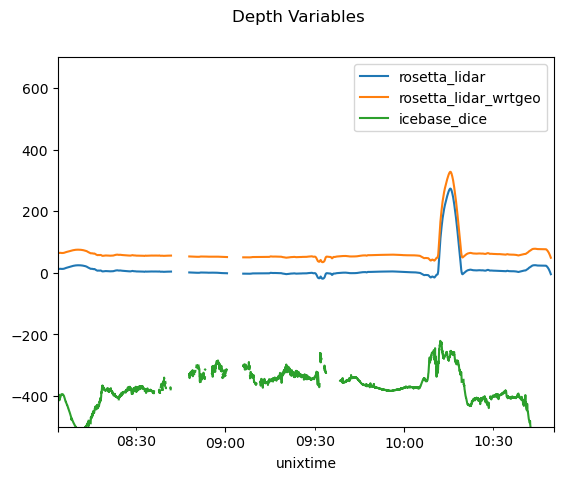

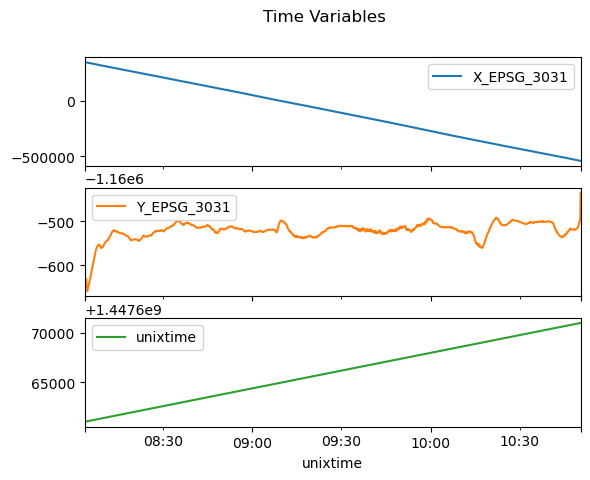

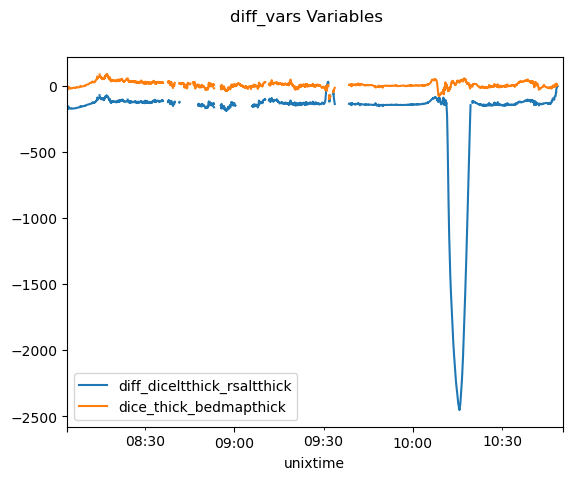

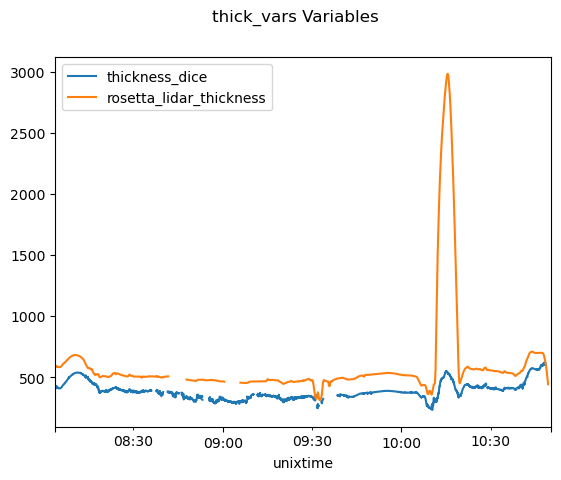

In [6]:
depth_vars = ['rosetta_lidar', 'rosetta_lidar_wrtgeo', 'icebase_dice',
             # 'thickness_dice', 'rosetta_lidar_thickness',
             ]
line[depth_vars].plot(subplots=False)
plt.ylim([-500, 700])
plt.suptitle('Depth Variables')

time_vars = ['X_EPSG_3031', 'Y_EPSG_3031', 'unixtime', 
            #  'diff_diceltthick_rsaltthick', 'dice_thick_bedmapthick',
            # 'thickness_dice', 'rosetta_lidar_thickness', 
             ]
line[time_vars].plot(subplots=True)
plt.suptitle('Time Variables')

diff_vars = ['diff_diceltthick_rsaltthick', 'dice_thick_bedmapthick',
             ]
line[diff_vars].plot(subplots=False)
plt.suptitle('diff_vars Variables')

thick_vars = ['thickness_dice', 'rosetta_lidar_thickness', 
             ]
line[thick_vars].plot(subplots=False)
plt.suptitle('thick_vars Variables')

### show where line is on Ross Ice shelf

In [7]:
import geopandas as gpd

fix_PROJ_path()

## Other outline options
# data/ASE_catchments_matchGL.geojson
# data/ASE_GroundingLine_simple.geojson

outlines = '../data/external/ASE_catchments+GL_3031.shp'

shapefile = gpd.read_file(outlines)

shapefile.head()

,groundedic,grounded_1,geometry
0,Grounded,GR,"POLYGON ((-1608074.997 -638549.999, -1608123.7..."
1,Grounded,GR,"POLYGON ((-1739481.254 -401608.850, -1740262.4..."
2,Grounded,GR,"POLYGON ((-1609325.000 -722675.000, -1609325.0..."
3,Grounded,GR,"MULTIPOLYGON (((-1604824.996 -612051.692, -160..."
4,Grounded,GR,"POLYGON ((-1908272.291 -410339.703, -1908540.1..."


# Reverse engineering TWTT 

In [8]:
from nasa_combined.custom_funcs import calc_twtt

line['PickTime'] = calc_twtt(line['thickness_dice'], cIce)

### Read in ROSETTA matfile to check this calculation

In [9]:
suffix = '.mat'
datafile = 'AN02_F1005_1usCh1_20151116_094349_23_Picks'

matfile = os.path.join(data_path, datafile + suffix)
print(matfile)
df_dice = read_DICE_matfile(matfile)

# time_vars = ['SurfTime', 'PickTime']
# df_dice[time_vars].plot(subplots=False)
# plt.suptitle('Time Variables')


/Users/dporter/data/Antarctic/ROSETTA/radar/AN02_F1005_1usCh1_20151116_094349_23_Picks.mat


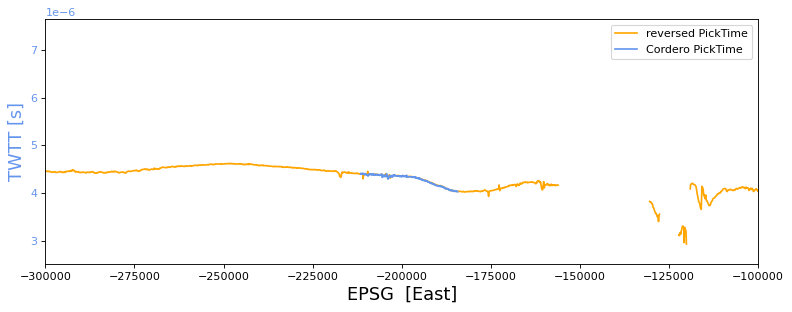

In [10]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

ax.plot(line['X_EPSG_3031'], line['PickTime'], 
        label='reversed PickTime', color='orange')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_ylabel('reversed TWTT [s]', color='orange', fontsize=16)
ax.set_xlabel('EPSG  [East]', color='black', fontsize=16)

# ax.plot(df_dice['EPSG_X'], df_dice['PickTime'] - (df_dice['SurfTime'] - df_dice['PickTime']), 
ax.plot(df_dice['EPSG_X'], df_dice['PickTime'], 
         color='cornflowerblue', label='Cordero PickTime', ls='-', marker='')
ax.tick_params(axis='y', labelcolor='cornflowerblue')
ax.set_ylabel('TWTT [s]', color='cornflowerblue', fontsize=16)

# plt.ylim([-400, 50])
# plt.xlim(pd.Timestamp('2015-12-02 11:10:00'), pd.Timestamp('2015-12-02 12:39:00'))
plt.xlim([-3e5, -1e5])

plt.legend()
plt.tight_layout()
plt.savefig('figs/lineoplot_TWTT_ln720_comp.png')

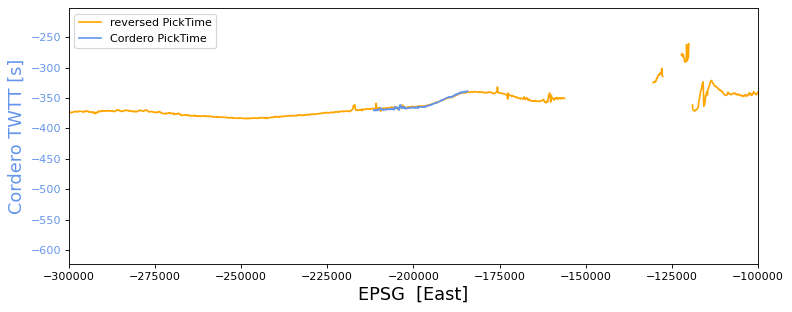

In [11]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=80)

ax.plot(line['X_EPSG_3031'], line['icebase_dice'], # - line['rosetta_lidar_wrtgeo'], 
        label='reversed PickTime', color='orange')
ax.tick_params(axis='y', labelcolor='orange')
ax.set_ylabel('reversed TWTT [s]', color='orange', fontsize=16)
ax.set_xlabel('EPSG  [East]', color='black', fontsize=16)

ax.plot(df_dice['EPSG_X'], df_dice['Depth'], 
         color='cornflowerblue', label='Cordero PickTime', ls='-', marker='')
ax.tick_params(axis='y', labelcolor='cornflowerblue')
ax.set_ylabel('Cordero TWTT [s]', color='cornflowerblue', fontsize=16)

# plt.ylim([-400, 50])
# plt.xlim(pd.Timestamp('2015-12-02 11:10:00'), pd.Timestamp('2015-12-02 12:39:00'))
plt.xlim([-3e5, -1e5])

plt.legend()
plt.tight_layout()
# plt.savefig('figs/lineoplot_TWTT_comparison.png')

## Convert to line `df` GeoPandas 

In [12]:
gdf = gpd.GeoDataFrame(
    line, geometry=gpd.points_from_xy(line.X_EPSG_3031, line.Y_EPSG_3031)
)
gdf.head()

,Line,X_EPSG_3031,Y_EPSG_3031,unixtime,thickness_dice,rosetta_lidar,rosetta_lidar_wrtgeo,rosetta_lidar_thickness,diff_diceltthick_rsaltthick,dice_thick_bedmapthick,icebase_dice,PickTime,geometry
unixtime,,,,,,,,,,,,,
2015-11-16 08:03:43,L720,347027.206945,-1.160631e+06,1.447661e+09,425.292852,13.621946,65.597413,596.762310,-171.469458,-20.404021,-411.670906,0.000005,POINT (347027.207 -1160630.892)
2015-11-16 08:03:44,L720,346933.674889,-1.160631e+06,1.447661e+09,427.646595,13.556247,65.528951,596.139479,-168.492885,-17.489983,-414.090348,0.000005,POINT (346933.675 -1160631.048)
2015-11-16 08:03:45,L720,346840.129981,-1.160631e+06,1.447661e+09,427.889264,13.479144,65.449081,595.412879,-167.523615,-16.688055,-414.410120,0.000005,POINT (346840.130 -1160631.427)
2015-11-16 08:03:46,L720,346746.525284,-1.160632e+06,1.447661e+09,427.527091,13.401990,65.369158,594.685788,-167.158698,-16.490762,-414.125101,0.000005,POINT (346746.525 -1160631.836)
2015-11-16 08:03:47,L720,346652.811815,-1.160632e+06,1.447661e+09,427.512157,13.324719,65.289115,593.957615,-166.445457,-15.945490,-414.187438,0.000005,POINT (346652.812 -1160632.229)


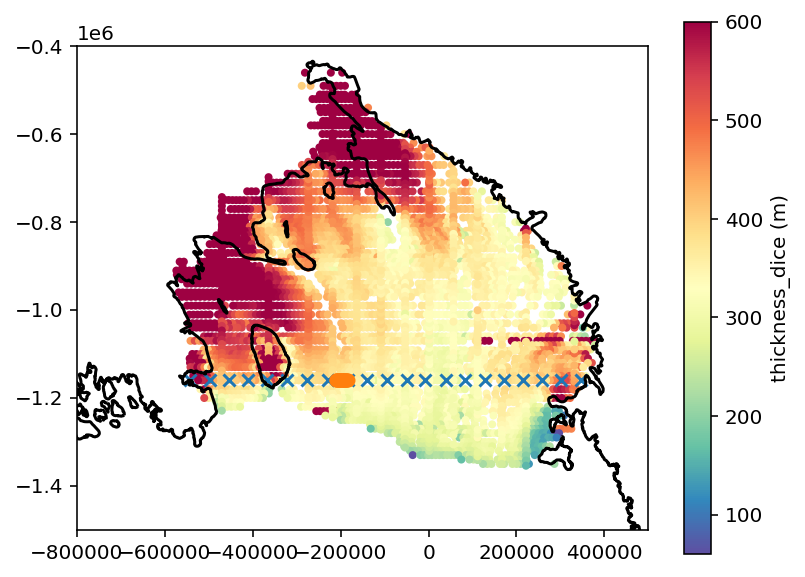

In [13]:
## Plot setup
grey_cmap = get_custom_cmap()
plot_i = 100
start_channel = '2015-12-02 11:20:00'
end_channel = '2015-12-02 11:25:00'

## Plot
fig, ax = plt.subplots(dpi=144)  # figsize=(8, 8), 
ax.set_aspect('equal')

shapefile.boundary.plot(ax=ax, edgecolor='black')

plt.scatter(df[::plot_i].X_EPSG_3031, df[::plot_i].Y_EPSG_3031, 
            c=df[::plot_i].thickness_dice,
            vmin=60, vmax=600,
            marker='.',
            cmap="Spectral_r")
plt.colorbar(label="thickness_dice (m)")

gdf[::500].plot(ax=ax, marker='x')
# gdf.loc[start_channel:end_channel].plot(ax=ax, marker='d')
plt.scatter(df_dice['EPSG_X'][::plot_i], df_dice['EPSG_Y'][::plot_i])

plt.xlim(-0.8e6, 0.5e6)
plt.ylim(-1.5e6, -0.4e6)

plt.savefig('figs/mapplot_ROSETTA_ln720_channel.png')



## calc new TWTT across all dataframe

In [14]:
from nasa_combined.custom_funcs import calc_twtt

df['PickTime'] = calc_twtt(df['thickness_dice'], cIce)

(-1500000.0, -400000.0)

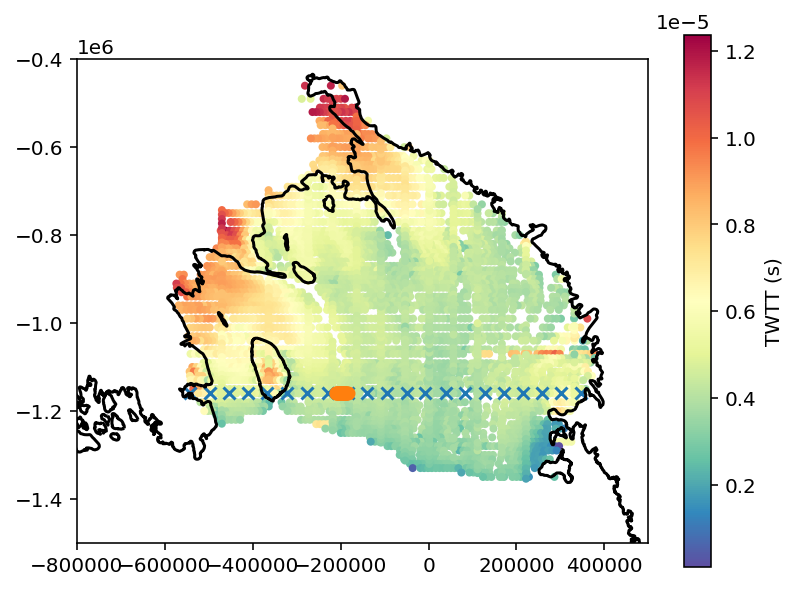

In [15]:
## Plot
fig, ax = plt.subplots(dpi=144)  # figsize=(8, 8), 
ax.set_aspect('equal')

shapefile.boundary.plot(ax=ax, edgecolor='black')

plt.scatter(df[::plot_i].X_EPSG_3031, df[::plot_i].Y_EPSG_3031, 
            c=df[::plot_i].PickTime,
            # vmin=60, vmax=600,
            marker='.',
            cmap="Spectral_r")
plt.colorbar(label="TWTT (s)")

gdf[::500].plot(ax=ax, marker='x')
# gdf.loc[start_channel:end_channel].plot(ax=ax, marker='d')
plt.scatter(df_dice['EPSG_X'][::plot_i], df_dice['EPSG_Y'][::plot_i])

plt.xlim(-0.8e6, 0.5e6)
plt.ylim(-1.5e6, -0.4e6)

## Save new TWTT

In [16]:
df.to_csv('../data/processed/test_ROSETTA_combined_twtt.csv')

# Appendix